In [42]:
import pandas as pd

df = pd.read_csv('Customers.csv', delimiter=';')

In [43]:
df.head()

,ID,Gender,MaritalStatus,Age,Education,Income,Occupation,SettlementSize
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['ID'], axis=1)
# geen y

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [45]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
s_score = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    classes=kmeans.predict(X_scaled)
    s_score[i] = (silhouette_score(X, classes))



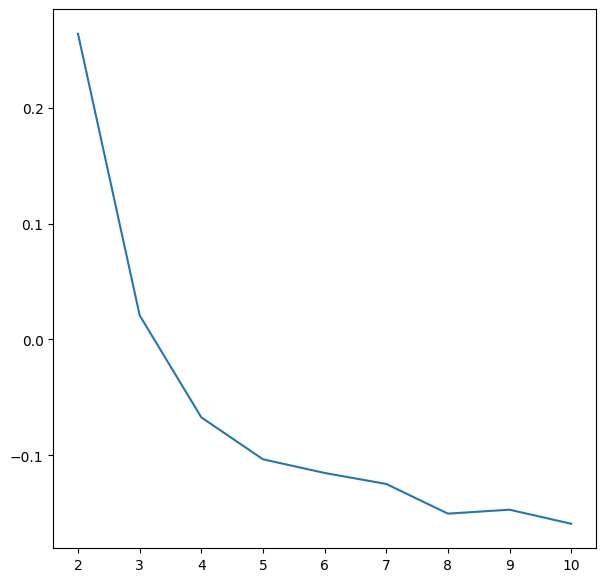

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(list(s_score.keys()),list(s_score.values()))

In [48]:
kmeans = KMeans(n_clusters=8, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['y_kmeans'] = y_kmeans

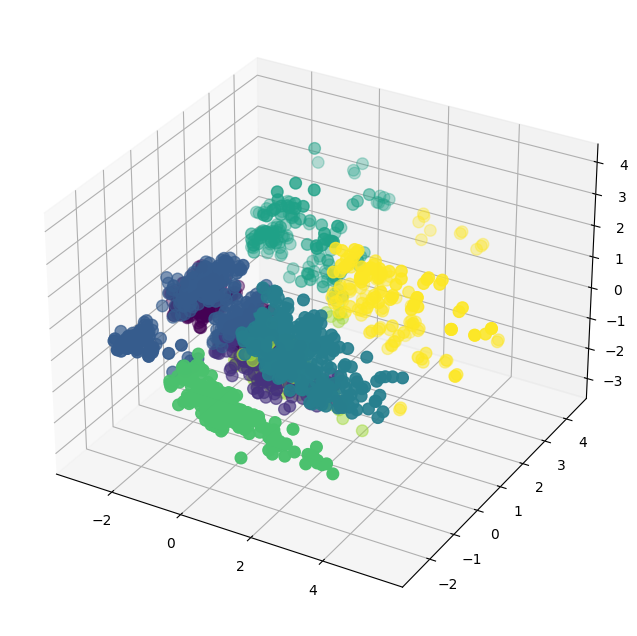

In [49]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
fig = ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=70, c=df['y_kmeans'])